In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

veriler = []

for i in range(0, 18):
    adres = f'https://www.arabam.com/ikinci-el/otomobil?take=50&page={i}'  
    sayfa = requests.get(adres)
    soup = BeautifulSoup(sayfa.content, 'html.parser')
    
    araba_listesi = soup.find_all('tr', class_='listing-list-item should-hover bg-white')
    
    for listing in araba_listesi:
        yil = listing.find('a', class_='').text.strip()
        model = listing.find('div', class_='listing-text-new word-break val-middle color-black2018').text.strip()
        km = listing.find_all('td', class_='listing-text')[1].text.strip()
        renk = listing.find_all('td', class_='listing-text')[2].text.strip()
        fiyat = listing.find('span', class_='db no-wrap listing-price').text.strip()
        tarih = listing.find_all('td', class_='listing-text tac')[0].text.strip()
        
        il_span = listing.find('span', title=True)
        il = il_span['title'].strip() if il_span else "Bilinmiyor"

        veriler.append([model, yil, km, renk, fiyat, tarih, il])
            
df = pd.DataFrame(veriler, columns=['Model', 'Yıl', 'Km', 'Renk', 'Fiyat', 'Tarih', 'Il'])

# Tüm satırları göstermek için pandas ayarlarını değiştirin
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(df)

'''Fiyat ve Km sütunlarını temizleme ve sayısal değerlere dönüştürme
df['Fiyat'] = df['Fiyat'].str.replace('TL', '').str.replace('.', '').str.replace(',', '').replace('-', np.nan).astype(float)
df['Km'] = df['Km'].str.replace('.', '').replace('-', np.nan).astype(float) 

# Eksik veya hatalı verileri temizleme
df = df.dropna(subset=['Fiyat', 'Km'])

# Tanımlayıcı İstatistikler
mean_fiyat = df['Fiyat'].mean()
median_fiyat = df['Fiyat'].median()
mode_fiyat = df['Fiyat'].mode().iloc[0] if not df['Fiyat'].mode().empty else np.nan
std_fiyat = df['Fiyat'].std()
variance_fiyat = df['Fiyat'].var()

print("Fiyat Ortalaması:", mean_fiyat)
print("Fiyat Medyanı:", median_fiyat)
print("Fiyat Modu:", mode_fiyat)
print("Fiyat Standart Sapması:", std_fiyat)
print("Fiyat Varyansı:", variance_fiyat)

# Korelasyon Analizi Hesaplama
korelasyon = df[['Fiyat', 'Km']].corr(method='pearson')
print("\nFiyat ve Kilometre Arasındaki Korelasyon:") 
print(korelasyon)

# Fiyat ve kilometre arasındaki ilişkiyi görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Km', y='Fiyat', data=df)
plt.title('Kilometre ve Fiyat Arasındaki İlişki')
plt.xlabel('Kilometre')
plt.ylabel('Fiyat')
plt.show()
'''
df.to_csv('arabalar.csv', index=False)

                                                 Model   Yıl         Km             Renk           Fiyat          Tarih              Il
0                      Ford Fusion 1.4 TDCi Collection  2010    219.258      Gri (Gümüş)      370.000 TL  24 Kasım 2024         Denizli
1                 Volkswagen Golf 1.0 TSi Midline Plus  2017     73.000         Lacivert      925.500 TL  24 Kasım 2024         Kocaeli
2                BMW 4 Serisi 418i Gran Coupe Prestige  2016    169.000             Füme    1.360.000 TL  24 Kasım 2024          Yozgat
3                      Toyota Corolla 1.4 D-4D Advance  2013    200.000            Beyaz      745.999 TL  24 Kasım 2024             Van
4                                     Mazda Lantis 1.8  1997    302.000            Beyaz      290.000 TL  24 Kasım 2024          Manisa
5                               Renault Clio 1.2 Touch  2012     63.700            Beyaz      650.000 TL  24 Kasım 2024           Konya
6                                  Volkswagen Po

In [8]:
#Fiyat ve Km sütunlarını temizleme ve sayısal değerlere dönüştürme
df['Fiyat'] = df['Fiyat'].str.replace('TL', '').str.replace('.', '').str.replace(',', '').replace('-', np.nan).astype(float)
df['Km'] = df['Km'].str.replace('.', '').replace('-', np.nan).astype(float) 

# Eksik veya hatalı verileri temizleme
df = df.dropna(subset=['Fiyat', 'Km'])

# Tanımlayıcı İstatistikler
mean_fiyat = df['Fiyat'].mean()
median_fiyat = df['Fiyat'].median()
mode_fiyat = df['Fiyat'].mode().iloc[0] if not df['Fiyat'].mode().empty else np.nan
std_fiyat = df['Fiyat'].std()
variance_fiyat = df['Fiyat'].var()

print("Fiyat Ortalaması:", mean_fiyat)
print("Fiyat Medyanı:", median_fiyat)
print("Fiyat Modu:", mode_fiyat)
print("Fiyat Standart Sapması:", std_fiyat)
print("Fiyat Varyansı:", variance_fiyat)

Fiyat Ortalaması: 914254.9931972789
Fiyat Medyanı: 620000.0
Fiyat Modu: 650000.0
Fiyat Standart Sapması: 5731231.265290385
Fiyat Varyansı: 32847011816242.03


In [9]:
# Korelasyon Analizi Hesaplama
korelasyon = df[['Fiyat', 'Km']].corr(method='pearson')
print("\nFiyat ve Kilometre Arasındaki Korelasyon:") 
print(korelasyon)



Fiyat ve Kilometre Arasındaki Korelasyon:
          Fiyat        Km
Fiyat  1.000000  0.015019
Km     0.015019  1.000000


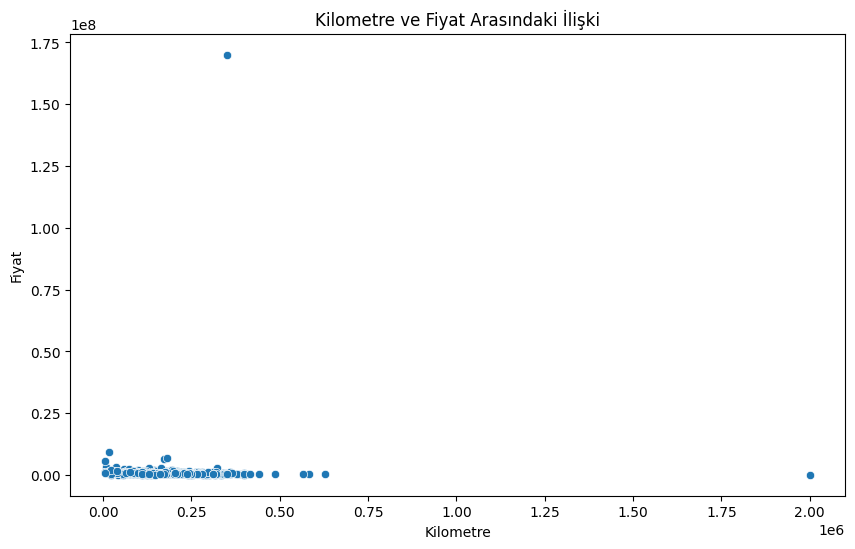

In [10]:
# Fiyat ve kilometre arasındaki ilişkiyi görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Km', y='Fiyat', data=df)
plt.title('Kilometre ve Fiyat Arasındaki İlişki')
plt.xlabel('Kilometre')
plt.ylabel('Fiyat')
plt.show()

In [12]:
#Regresyon Analizi
X = df['Km']  
Y = df['Fiyat']  
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Fiyat   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1985
Date:                Sun, 24 Nov 2024   Prob (F-statistic):              0.656
Time:                        21:22:35   Log-Likelihood:                -14976.
No. Observations:                 882   AIC:                         2.996e+04
Df Residuals:                     880   BIC:                         2.997e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.702e+05   3.77e+05      2.045      0.0